# **L1-based feature selection**

## Regression we use Lasso model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop('Unnamed: 0', inplace=True, axis  =1)

In [5]:
X = df.drop('price', axis=1)
y = df['price']

In [6]:
X1 = pd.get_dummies(X, drop_first=True)
X1.head(2)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2)

### Applying the L1 norm or Lasso model

In [8]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 100)
lasso_model.fit(X_train, y_train)

Lasso(alpha=100)

In [9]:
lasso_model.coef_

array([4761.67621479,  -22.21481579,  -47.06925407, 1035.35753319,
        131.11433246,    0.        ,   -0.        ,    0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
          0.        ,  -39.51746952, -471.15695549,    0.        ,
          0.        ,    0.        ,    0.        ])

In [10]:
X1.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

Here you can see that lassomodel.coef output for some features it is geeting 0 output because that features are not important and internally it is applying some algorithm and dropping that features.

In [11]:
# We can take the features manually or we can use SelectFromModel library to do that (below is the code)

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(lasso_model, prefit=True)

X_new = model.transform(X1)
X_new.shape

(53940, 7)

**We can control that dropping of features by tuning the alpha value**

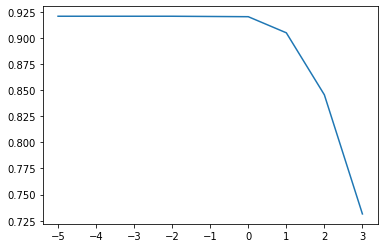

In [12]:
# choosing the alpha value by graph

alpha = [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]
log_alpha = np.log10(alpha)
score = []
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
for i in alpha:
    lasso = Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    y_lasso = lasso.predict(X_test)
    score.append(r2_score(y_test, y_lasso))

plt.plot(log_alpha, score)

So after 1 the score is falling so you can choose alpha value as 1 or less than 1

In [13]:
# choosing the alpha value by gridsearch cv

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,5, 10, 20, 30, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X1,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [14]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-2236053.215349131


## Classification we use LogisticRegression and Linear SVM

In [15]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [16]:
X.shape

(150, 4)

In [17]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)

In [18]:
X_new.shape

(150, 3)

# Conclusion:

* As you can see we have used penality as l1 andfor X_new dataset one feature is reduced

* We can do this for Logistic Regression also


In [19]:
# small eg for the logestic regression is :
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1')